### Basketball Player Clusterisation and Prediction of the performance for next 3 seasons

In [1]:
import pandas as pd

In [2]:
#load the file into a dataframe
player_df = pd.read_csv('./nba-players-stats/Players.csv')

#rename the columns
player_df.columns = ['Id','Player','height','weight','collage','born','birth_city','birth_state']

#get the top 5 rows
player_df.head()

Id           Player  height  weight                          collage  \
0   0  Curly Armstrong   180.0    77.0               Indiana University   
1   1     Cliff Barker   188.0    83.0           University of Kentucky   
2   2    Leo Barnhorst   193.0    86.0         University of Notre Dame   
3   3       Ed Bartels   196.0    88.0  North Carolina State University   
4   4      Ralph Beard   178.0    79.0           University of Kentucky   

     born   birth_city birth_state  
0  1918.0          NaN         NaN  
1  1921.0     Yorktown     Indiana  
2  1924.0          NaN         NaN  
3  1925.0          NaN         NaN  
4  1927.0  Hardinsburg    Kentucky

In [3]:
#load the stats file 
season_stats = pd.read_csv('./nba-players-stats/Seasons_Stats.csv')

#data analysis
#season_stats.head()

#getting one value to see all 53 columns on the screen in the transpose mode
season_stats[season_stats['Player'] == 'Curly Armstrong'].transpose()



#create the feature dictionary (list of columns and the new name) to be used for clusterization
features_dict = {"Player":"Player","G":"Games","MP":"MinutesPlayed","FG":"FieldGoals","FGA":"FieldGoalsAttempts","3P":"3Points"
           ,"3PA":"3PointsAttempts","2P":"2Points"
           ,"2PA":"2PointsAttempts","FT":"FreeThrows","FTA":"FreeThrowsAttempts","ORB":"OffensiveRebounds","DRB":"DefensiveRebounds","AST":"Asissts"
           ,"STL":"Steals","BLK":"Blocks","TOV":"Turnovers","PF":"PersonFoul","PTS":"Points","GS":"GamesStarted"}

#create the list for features
features_list = []
for i in features_dict.keys():
    features_list.append(i)
    
#get the desired fields only
season_stats = season_stats[features_list]


#rename columns for better understanting of the content
season_stats.rename(index=str, columns = features_dict, inplace=True)


#before grouping on the Player level we need to replace NaN with 0 
season_stats = season_stats.fillna(0)


#group the data to the Player Level having the Player as an index
print("Before grouping:", season_stats.shape)
season_stats = season_stats.groupby('Player').sum() #,as_index=False
print("After grouping:",season_stats.shape)
season_stats.head()


Before grouping: (24691, 20)
After grouping: (3922, 19)


Games  MinutesPlayed  FieldGoals  FieldGoalsAttempts  3Points  \
Player                                                                          
0                 0.0            0.0         0.0                 0.0      0.0   
A.C. Green     1361.0        39044.0      4778.0              9686.0    125.0   
A.J. Bramlett     8.0           61.0         4.0                21.0      0.0   
A.J. English    151.0         3108.0       617.0              1418.0      9.0   
A.J. Guyton      80.0         1246.0       166.0               440.0     73.0   

               3PointsAttempts  2Points  2PointsAttempts  FreeThrows  \
Player                                                                 
0                          0.0      0.0              0.0         0.0   
A.C. Green               509.0   4653.0           9177.0      3247.0   
A.J. Bramlett              0.0      4.0             21.0         0.0   
A.J. English              65.0    608.0           1353.0       259.0   
A.J. Guyton              193.0     93.0            247.0        37.0   

               FreeThrowsAttempts  OffensiveRebounds  DefensiveRebounds  \
Player                                                                    
0                             0.0                0.0                0.0   
A.C. Green                 4447.0             3576.0             6553.0   
A.J. Bramlett                 0.0               12.0               10.0   
A.J. English                333.0              140.0              175.0   
A.J. Guyton                  45.0               22.0               58.0   

               Asissts  Steals  Blocks  Turnovers  PersonFoul   Points  \
Player                                                                   
0                  0.0     0.0     0.0        0.0         0.0      0.0   
A.C. Green      1469.0  1103.0   562.0     1508.0      2581.0  12928.0   
A.J. Bramlett      0.0     1.0     0.0        3.0        13.0      8.0   
A.J. English     320.0    57.0    24.0      203.0       287.0   1502.0   
A.J. Guyton      147.0    20.0    12.0       62.0        58.0    442.0   

               GamesStarted  
Player                       
0                       0.0  
A.C. Green            905.0  
A.J. Bramlett           0.0  
A.J. English           18.0  
A.J. Guyton            14.0

In [4]:
# check the statistics to understand if we have some fields without data
season_stats.describe().transpose()

count         mean           std  min     25%     50%  \
Games               3922.0   319.177206    344.005156  0.0   41.00   165.5   
MinutesPlayed       3922.0  7445.239419  10123.008957  0.0  268.25  2287.5   
FieldGoals          3922.0  1226.339368   1872.406934  0.0   46.00   325.0   
FieldGoalsAttempts  3922.0  2703.778939   3995.766657  0.0  116.00   786.5   
3Points             3922.0   107.206527    288.112997  0.0    0.00     1.0   
3PointsAttempts     3922.0   306.945946    786.797517  0.0    0.00     6.0   
2Points             3922.0  1119.132840   1748.599928  0.0   41.25   293.0   
2PointsAttempts     3922.0  2396.832993   3625.719079  0.0  102.00   700.5   
FreeThrows          3922.0   642.844212   1067.193829  0.0   23.00   164.5   
FreeThrowsAttempts  3922.0   858.733554   1395.155185  0.0   35.00   236.5   
OffensiveRebounds   3922.0   329.767721    601.332368  0.0    1.00    53.5   
DefensiveRebounds   3922.0   780.547170   1370.590032  0.0    3.25   124.5   
Asissts             3922.0   721.094085   1283.575150  0.0   23.00   174.0   
Steals              3922.0   211.560173    357.232131  0.0    1.00    38.0   
Blocks              3922.0   129.757267    305.892268  0.0    0.00    15.0   
Turnovers           3922.0   370.359001    634.774456  0.0    0.00    54.0   
PersonFoul          3922.0   730.427588    905.867883  0.0   47.00   286.0   
Points              3922.0  3202.729475   4913.030984  0.0  120.00   857.5   
GamesStarted        3922.0   109.683325    222.548659  0.0    0.00     1.0   

                         75%      max  
Games                 541.00   2078.0  
MinutesPlayed       11554.00  57446.0  
FieldGoals           1695.25  15837.0  
FieldGoalsAttempts   3771.00  28307.0  
3Points                37.00   3174.0  
3PointsAttempts       134.00   7962.0  
2Points              1519.25  15836.0  
2PointsAttempts      3310.75  28289.0  
FreeThrows            814.00   9787.0  
FreeThrowsAttempts   1115.50  13188.0  
OffensiveRebounds     393.00   7168.0  
DefensiveRebounds    1002.75  11716.0  
Asissts               849.25  15806.0  
Steals                277.75   3265.0  
Blocks                116.00   3830.0  
Turnovers             465.75   4524.0  
PersonFoul           1159.50   5058.0  
Points               4377.50  38387.0  
GamesStarted           96.75   1475.0

### Scale the Features using StandardScaler 

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
X = StandardScaler().fit_transform(season_stats)
X

array([[-0.92794512, -0.7355707 , -0.65503696, ..., -0.80643186,
        -0.65196777, -0.49291382],
       [ 3.02889541,  3.12187709,  1.89708414, ...,  2.04313279,
         1.97973728,  3.57413111],
       [-0.90468669, -0.72954405, -0.6529004 , ..., -0.79207916,
        -0.65033924, -0.49291382],
       ..., 
       [-0.83491139, -0.72075108, -0.64328588, ..., -0.79318321,
        -0.64056806, -0.48392588],
       [-0.49766415, -0.57907553, -0.54981137, ..., -0.54477095,
        -0.53776708, -0.4479741 ],
       [ 1.52291202,  1.53331283,  1.59209018, ...,  2.25842342,
         1.58237587,  2.76072212]])

### Clustering with k-Means

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=5)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


**Check the Centers of the 5 clusters**

In [9]:
centers = model.cluster_centers_
centers

array([[ 2.53681651,  3.15085487,  3.64764344,  3.43529311,  0.9470758 ,
         1.08135683,  3.74986177,  3.55124612,  3.77337761,  3.85712934,
         3.60412478,  3.81240258,  2.53191691,  2.88433201,  3.3762764 ,
         3.51392106,  2.85030435,  3.65549005,  3.41815738],
       [-0.62311703, -0.59212192, -0.54203051, -0.54871342, -0.30891149,
        -0.32004565, -0.52950949, -0.53526476, -0.49844276, -0.5021827 ,
        -0.45089037, -0.47807454, -0.46257345, -0.49357966, -0.35536963,
        -0.48735762, -0.59951293, -0.53953248, -0.4432067 ],
       [ 0.73220141,  0.49011039,  0.33066893,  0.35695173,  0.18813407,
         0.19709179,  0.32308301,  0.35061306,  0.25953408,  0.27836476,
         0.34424328,  0.32054951,  0.30270588,  0.34923608,  0.24045958,
         0.28408161,  0.62528071,  0.31945059,  0.18706392],
       [ 1.83298381,  2.04075016,  1.78638282,  1.92736448,  3.61920774,
         3.61273929,  1.31653602,  1.34009402,  1.56323867,  1.44126353,
         0.745

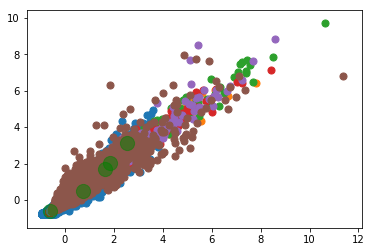

In [137]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.scatter(X[:, 2], X[:, 3], s=50, cmap='viridis')
plt.scatter(X[:, 4], X[:, 5], s=50, cmap='viridis')
plt.scatter(X[:, 6], X[:, 7], s=50, cmap='viridis')
plt.scatter(X[:, 8], X[:, 9], s=50, cmap='viridis')
plt.scatter(X[:, 10], X[:,11], s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5)

plt.show()


#### The above scatter graph is not giving us a clear view of the clusterization, that's why we will go with the parrallel plots that will give us a view about how the features trends is

### We will use the parallel scater plot from pandas as the result is multidimensional

In [107]:
# Function that creates a DataFrame with a column for Cluster Number

model_features_dict = {"G":"Games","MP":"MinutesPlayed","FG":"FieldGoals","FGA":"FieldGoalsAttempts","3P":"3Points"
           ,"3PA":"3PointsAttempts","2P":"2Points"
           ,"2PA":"2PointsAttempts","FT":"FreeThrows","FTA":"FreeThrowsAttempts","ORB":"OffensiveRebounds","DRB":"DefensiveRebounds","AST":"Asissts"
           ,"STL":"Steals","BLK":"Blocks","TOV":"Turnovers","PF":"PersonFoul","PTS":"Points","GS":"GamesStarted"}

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
    #add the prediction to the list of columns as we will use it as Y axis
	colNames.append('prediction') 

	# Concatenate with a column called 'prediction' (index) that will contain index value
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
    # Convert the type of the Prediction field to be int
	P['prediction'] = P['prediction'].astype(int)
	return P

In [132]:
# Function that creates Parallel Plots using parallel_coordinates from pandas

def parallel_plot(data):
    # get cycles of 5 colors for the plot lines
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    # set the fig size and Y axes limits
	plt.figure(figsize=(20,10)).gca().axes.set_ylim([-1,+5])
    #use parallel_coordinates method to plot a dataframe with given labels/indexes (prediction), having the market the point with the marker 0 
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [131]:
import numpy as np

#call the function to create a dataframe from the center of the K-Mean algorithm, having the fieldnames as of the features
P = pd_centers(model_features_dict.keys(), centers)
P
#season_stats.columns

G        MP        FG       FGA        3P       3PA        2P  \
0  2.536817  3.150855  3.647643  3.435293  0.947076  1.081357  3.749862   
1 -0.623117 -0.592122 -0.542031 -0.548713 -0.308911 -0.320046 -0.529509   
2  0.732201  0.490110  0.330669  0.356952  0.188134  0.197092  0.323083   
3  1.832984  2.040750  1.786383  1.927364  3.619208  3.612739  1.316536   
4  1.619566  1.717211  1.721589  1.688579 -0.134283 -0.096949  1.865610   

        2PA        FT       FTA       ORB       DRB       AST       STL  \
0  3.551246  3.773378  3.857129  3.604125  3.812403  2.531917  2.884332   
1 -0.535265 -0.498443 -0.502183 -0.450890 -0.478075 -0.462573 -0.493580   
2  0.350613  0.259534  0.278365  0.344243  0.320550  0.302706  0.349236   
3  1.340094  1.563239  1.441264  0.745095  1.403480  2.136672  2.250932   
4  1.881956  1.631123  1.657170  1.502243  1.377071  1.237007  1.217911   

        BLK       TOV        PF       PTS        GS  prediction  
0  3.376276  3.513921  2.850304  3.655490  3.418157           0  
1 -0.355370 -0.487358 -0.599513 -0.539532 -0.443207           1  
2  0.240460  0.284082  0.625281  0.319451  0.187064           2  
3  0.494788  2.196761  1.446785  1.913420  2.341464           3  
4  1.171877  1.197604  1.829127  1.658664  1.028942           4

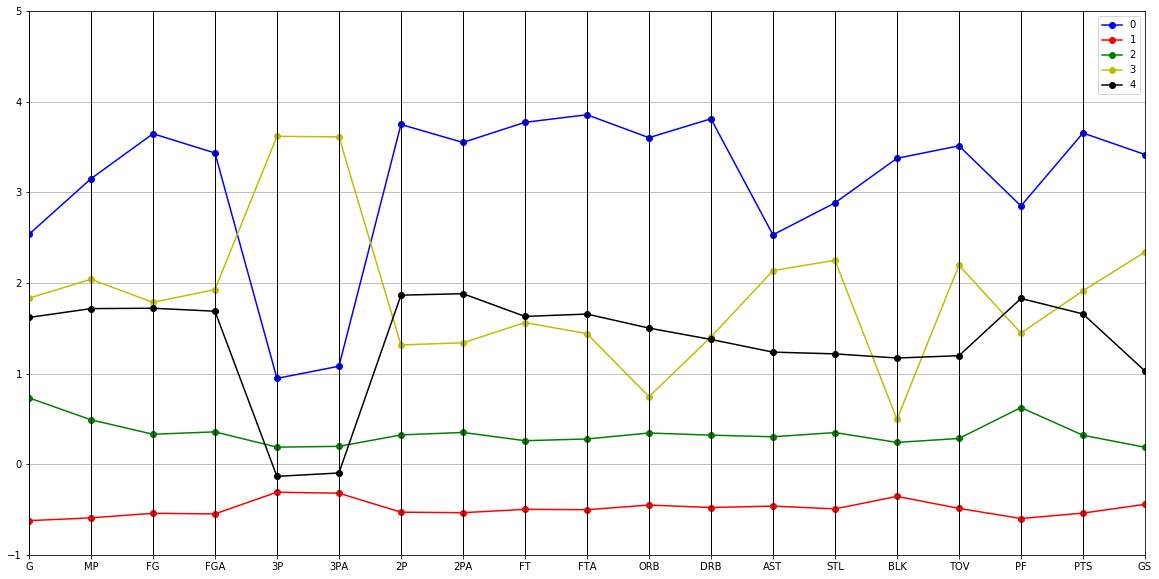

{'G': 'Games', 'MP': 'MinutesPlayed', 'FG': 'FieldGoals', 'FGA': 'FieldGoalsAttempts', '3P': '3Points', '3PA': '3PointsAttempts', '2P': '2Points', '2PA': '2PointsAttempts', 'FT': 'FreeThrows', 'FTA': 'FreeThrowsAttempts', 'ORB': 'OffensiveRebounds', 'DRB': 'DefensiveRebounds', 'AST': 'Asissts', 'STL': 'Steals', 'BLK': 'Blocks', 'TOV': 'Turnovers', 'PF': 'PersonFoul', 'PTS': 'Points', 'GS': 'GamesStarted'}


In [130]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

#as we have only 5 centers we can show all of them

parallel_plot(P)

# we can also filter to see just a part of the centers 
#parallel_plot(P[P['G'] < 20])


plt.show()
print(model_features_dict)


# We need to have our labels to the real data so we can indentify which specific player behave in a specific way and what are his stats

In [105]:
#make the index as a field and have the indexes started from 0 to the length of the dataframe
season_stats.reset_index(level=0,inplace = False)

k_labels_df = pd.DataFrame(model.labels_)

#insert the labels from the model to the real data dataframe
season_stats.insert((season_stats.shape[1]),'k_lables',k_labels_df)

#delete a field from a dataframe
#season_stats.pop('k_lables')


#season_stats.shape
season_stats.head()

Player   Games  MinutesPlayed  FieldGoals  FieldGoalsAttempts  \
0              0     0.0            0.0         0.0                 0.0   
1     A.C. Green  1361.0        39044.0      4778.0              9686.0   
2  A.J. Bramlett     8.0           61.0         4.0                21.0   
3   A.J. English   151.0         3108.0       617.0              1418.0   
4    A.J. Guyton    80.0         1246.0       166.0               440.0   

   3Points  3PointsAttempts  2Points  2PointsAttempts  FreeThrows    ...     \
0      0.0              0.0      0.0              0.0         0.0    ...      
1    125.0            509.0   4653.0           9177.0      3247.0    ...      
2      0.0              0.0      4.0             21.0         0.0    ...      
3      9.0             65.0    608.0           1353.0       259.0    ...      
4     73.0            193.0     93.0            247.0        37.0    ...      

   OffensiveRebounds  DefensiveRebounds  Asissts  Steals  Blocks  Turnovers  \
0                0.0                0.0      0.0     0.0     0.0        0.0   
1             3576.0             6553.0   1469.0  1103.0   562.0     1508.0   
2               12.0               10.0      0.0     1.0     0.0        3.0   
3              140.0              175.0    320.0    57.0    24.0      203.0   
4               22.0               58.0    147.0    20.0    12.0       62.0   

   PersonFoul   Points  GamesStarted  k_lables  
0         0.0      0.0           0.0         1  
1      2581.0  12928.0         905.0         0  
2        13.0      8.0           0.0         1  
3       287.0   1502.0          18.0         1  
4        58.0    442.0          14.0         1  

[5 rows x 21 columns]

In [124]:
# see the real data of the first cluster
season_stats[season_stats['k_lables'] == 0].head()

Player   Games  MinutesPlayed  FieldGoals  FieldGoalsAttempts  \
1         A.C. Green  1361.0        39044.0      4778.0              9686.0   
30   Adrian Dantley*  1107.0        39506.0      9217.0             17203.0   
73     Alex English*  1271.0        40464.0     11212.0             22149.0   
93    Allen Iverson*  1064.0        43303.0      9532.0             22369.0   
99  Alonzo Mourning*   875.0        26677.0      5216.0              9913.0   

    3Points  3PointsAttempts  2Points  2PointsAttempts  FreeThrows    ...     \
1     125.0            509.0   4653.0           9177.0      3247.0    ...      
30      7.0             42.0   9210.0          17161.0      7833.0    ...      
73     20.0             89.0  11192.0          22060.0      4487.0    ...      
93   1158.0           3704.0   8374.0          18665.0      7235.0    ...      
99     22.0             89.0   5194.0           9824.0      4139.0    ...      

    OffensiveRebounds  DefensiveRebounds  Asissts  Steals  Blocks  Turnovers  \
1              3576.0             6553.0   1469.0  1103.0   562.0     1508.0   
30             2589.0             3803.0   3254.0  1105.0   187.0     2894.0   
73             3047.0             4096.0   4575.0  1140.0   895.0     3035.0   
93              814.0             3025.0   6488.0  2213.0   185.0     3740.0   
99             2237.0             5098.0    964.0   422.0  2430.0     2266.0   

    PersonFoul   Points  GamesStarted  k_lables  
1       2581.0  12928.0         905.0         0  
30      2969.0  26274.0         613.0         0  
73      3233.0  26931.0         753.0         0  
93      2006.0  27457.0        1042.0         0  
99      2892.0  14593.0         703.0         0  

[5 rows x 21 columns]

In [125]:
# see the real data of the second cluster
season_stats[season_stats['k_lables'] == 1].head()

Player  Games  MinutesPlayed  FieldGoals  FieldGoalsAttempts  \
0              0    0.0            0.0         0.0                 0.0   
2  A.J. Bramlett    8.0           61.0         4.0                21.0   
3   A.J. English  151.0         3108.0       617.0              1418.0   
4    A.J. Guyton   80.0         1246.0       166.0               440.0   
5   A.J. Hammons   22.0          163.0        17.0                42.0   

   3Points  3PointsAttempts  2Points  2PointsAttempts  FreeThrows    ...     \
0      0.0              0.0      0.0              0.0         0.0    ...      
2      0.0              0.0      4.0             21.0         0.0    ...      
3      9.0             65.0    608.0           1353.0       259.0    ...      
4     73.0            193.0     93.0            247.0        37.0    ...      
5      5.0             10.0     12.0             32.0         9.0    ...      

   OffensiveRebounds  DefensiveRebounds  Asissts  Steals  Blocks  Turnovers  \
0                0.0                0.0      0.0     0.0     0.0        0.0   
2               12.0               10.0      0.0     1.0     0.0        3.0   
3              140.0              175.0    320.0    57.0    24.0      203.0   
4               22.0               58.0    147.0    20.0    12.0       62.0   
5                8.0               28.0      4.0     1.0    13.0       10.0   

   PersonFoul  Points  GamesStarted  k_lables  
0         0.0     0.0           0.0         1  
2        13.0     8.0           0.0         1  
3       287.0  1502.0          18.0         1  
4        58.0   442.0          14.0         1  
5        21.0    48.0           0.0         1  

[5 rows x 21 columns]

### Having the above clusterization we can start analysing each group and identify the why's. At the end we can still eliminate of not consider the group which shows that the player hasn't played an enough number of games, or maybe other criteria. 